In [1]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install -c conda-forge boruta_py

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [48]:
conda install -c anaconda py-xgboost

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Admin\anaconda3

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          12 KB  anaconda
    conda-22.11.1              |   py39haa95532_4         892 KB
    libxgboost-1.5.0           |       hd77b12b_1         2.3 MB  anaconda
    py-xgboost-1.5.0           |   py39haa95532_1         166 KB  anaconda
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  anaconda/win-64::_py-xgboost-mutex-2.0-cpu_0 
  libxgboost         anaconda/win-64::libxgboost-1.5.0-hd77b12b_1 
  py-xgboost         anaconda/win-64::py-xgboost-1.5.0-py39haa95532_1 

The following packages will

In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from BorutaShap import BorutaShap, load_data
from boruta import BorutaPy
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC

In [4]:
app_train = pd.read_csv(r'C:\Users\Admin\Documents\GitHub\CreditRiskML\data/loan.csv')

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

app_train.head(200)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1067038,1301405,12000.0,12000.0,12000.0,36 months,14.27,411.71,C,C2,Corning Inc.,8 years,MORTGAGE,70000.0,Not Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,oth

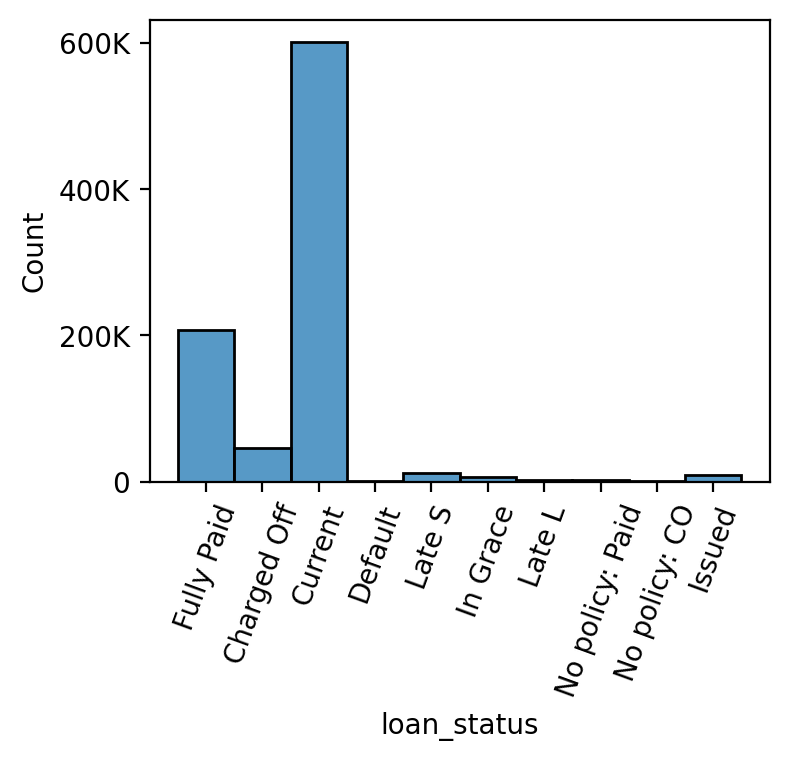

In [6]:
plt.figure(figsize=(4, 3), dpi=200)

# Create a histogram using seaborn
sns.histplot(app_train.loan_status, kde=False)

# Specify the locations of the x-tick marks
plt.xticks([0,1, 2, 3, 4, 5, 6, 7, 8, 9], ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late S', 'In Grace','Late L', 'No policy: Paid', 'No policy: CO', 'Issued'])

plt.yticks([0, 200000, 400000, 600000], ['0','200K','400K','600K'])

# Rotate the x-labels by 45 degrees
plt.xticks(rotation=70)

plt.savefig('status.svg', format='svg')

# Show the plot
plt.show()

In [15]:
app_train = pd.concat([app_train[app_train.loan_status == 'Fully Paid'], app_train[app_train.loan_status == 'Charged Off']], axis=0)

In [16]:
app_train.isnull().sum().sort_values()/len(app_train) *100

id                               0.000000
delinq_2yrs                      0.000000
earliest_cr_line                 0.000000
inq_last_6mths                   0.000000
open_acc                         0.000000
pub_rec                          0.000000
revol_bal                        0.000000
total_acc                        0.000000
initial_list_status              0.000000
out_prncp_inv                    0.000000
dti                              0.000000
total_pymnt                      0.000000
total_rec_prncp                  0.000000
total_rec_int                    0.000000
total_rec_late_fee               0.000000
recoveries                       0.000000
collection_recovery_fee          0.000000
last_pymnt_amnt                  0.000000
policy_code                      0.000000
application_type                 0.000000
acc_now_delinq                   0.000000
total_pymnt_inv                  0.000000
addr_state                       0.000000
out_prncp                        0

In [18]:
missing = app_train.isna().sum()/len(app_train)
select = missing[missing < 0.10]
app_train = app_train[select.index]

In [19]:
df = data.drop(labels=['total_pymnt','total_pymnt_inv', 'out_prncp','out_prncp_inv', 'funded_amnt_inv', 
                   'funded_amnt', 'total_rec_prncp', 'total_rec_late_fee', 'recoveries', 
                   'collection_recovery_fee', 'last_pymnt_amnt', 'total_rec_int', 'last_credit_pull_d', 'url', 'member_id', 'policy_code', 'last_pymnt_d'], axis=1)

In [20]:
df[['Issue Month','Issue Year']] = df.issue_d.str.split("-",expand=True)
df[['Earliest Credit Month', 'Earliest Credit Year']] = df.earliest_cr_line.str.split("-",expand=True)

df['Issue Year'] = df['Issue Year'].astype('int32')
df['Earliest Credit Year'] = df['Earliest Credit Year'].astype('int32')
   
df = df.drop(labels=['issue_d', 'earliest_cr_line'], axis=1)

In [21]:
df['grade'] = df['grade'].replace(['A', 'B', 'C', 'D', 'E', 'F', 'G'], [0, 1, 2, 3, 4, 5, 6])
df['sub_grade'] = df['sub_grade'].str.strip('ABCDEFG').astype('float64')
df['emp_length'] = df['emp_length'].str.strip(' <years')
df['emp_length'] = df['emp_length'].replace('10+',11).astype('float64')

In [22]:
df['Earliest Credit Month'] = df['Earliest Credit Month'].fillna('filler')
df['emp_title'] = df['emp_title'].fillna('filler')
df['title'] = df['title'].fillna('filler')

In [23]:
from sklearn.impute import SimpleImputer

# Select the numerical columns with missing values
h = df.select_dtypes(['float64', 'int64', 'int32']).isnull().sum()
columns  = h[h > 0].index

for column in columns:
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    df[column] = imputer.fit_transform(pd.DataFrame(df[column]))

In [24]:
import sklearn
from sklearn import preprocessing
columns = ['pymnt_plan', 'loan_status', 'term', 'grade','addr_state',
           'sub_grade', 'zip_code', 'title', 'Issue Month', 'Earliest Credit Month', 'emp_title']

for column in columns:
    enc = preprocessing.OrdinalEncoder()
    df[column] = enc.fit_transform(pd.DataFrame(df[column]))

In [25]:
oh_df = pd.DataFrame()
columns = ['verification_status', 'home_ownership', 'purpose', 'initial_list_status']
for column in columns:
    enc = preprocessing.OneHotEncoder(sparse=False)
    oh = pd.DataFrame(enc.fit_transform(pd.DataFrame(df[column])))
    oh = oh.add_prefix(column + '_') 
    oh_df = pd.concat([oh_df, oh], axis=1)

df = pd.concat([df.reset_index(),oh_df], axis=1)

# remove columns that were one-hot encoded
df = df.drop(labels=columns, axis=1)

# pymnt_plan has only zeros. application_type contains mostly one value
df = df.drop(labels=['index', 'pymnt_plan', 'application_type'], axis=1) 

In [26]:
X, y = df.drop(labels='loan_status', axis=1), df.loan_status

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [27]:
X_test_id = X_test.pop('id')
X_train_id = X_train.pop('id')

In [28]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(X_train, y_train)

# Predicting the Test set results
y_pred_full = clf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_full))

[09:46:14] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         0.0       0.51      0.09      0.15      9146
         1.0       0.83      0.98      0.90     41449

    accuracy                           0.82     50595
   macro avg       0.67      0.54      0.53     50595
weighted avg       0.77      0.82      0.76     50595



In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

# we can use the same train set created before, and add 'Charged Off' samples
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(X_train_resampled, y_train_resampled)

# Predicting the Test set results
y_pred_smote = clf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_smote))

[09:48:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
fp = pd.DataFrame(df[df.loan_status == 1])
co = pd.DataFrame(df[df.loan_status == 0])
new_df = pd.concat([pd.DataFrame(fp.sample(n=len(co))), df[df.loan_status == 0]], axis=0)

X, y = new_df.drop(labels='loan_status', axis=1), new_df.loan_status

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test_cut, y_train, y_test_cut = train_test_split(X, y, test_size = 0.2, random_state = 0)

# drop id label
X_test_id_cut = X_test_cut.pop('id')
X_train_id = X_train.pop('id')

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc2 = MinMaxScaler()
X_train = sc2.fit_transform(X_train)
X_test_cut = sc2.transform(X_test_cut)

from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(X_train, y_train)

# Predicting the Test set results
y_pred_cut = clf.predict(X_test_cut)

from sklearn.metrics import classification_report
print(classification_report(y_test_cut, y_pred_cut))

In [ ]:
ls = list(df.columns)
ls.remove('loan_status')
ls.remove('id')

# Restore X_test with names and ID
X_test = pd.DataFrame(sc.inverse_transform(X_test))
X_test.columns = ls
X_test = pd.concat([X_test_id.reset_index().iloc[:,1], X_test], axis=1)


# Restore X_test_cut with the id column and column names
X_test_cut = pd.DataFrame(sc2.inverse_transform(X_test_cut))
X_test_cut.columns = ls
X_test_cut = pd.concat([X_test_id_cut.reset_index().iloc[:,1], X_test_cut], axis=1)


# Calculate income loan for loan in the full set
income = []
for i in range(len(X_test)):
    if y_test.iloc[i] == 0 and y_pred_full[i] == 1:
        income.append(-X_test.loan_amnt[i] + data.loc[data.id == X_test.id[i]].total_pymnt.values[0])
    if y_test.iloc[i] == 1 and y_pred_full[i] == 1: 
        income.append(((X_test.term[i] + 3/2)*2 * (X_test.int_rate[i]/100) * X_test.loan_amnt[i]))
        
# Calculate income loan for loan for the SMOTE set
income_smote = []
for i in range(len(X_test)):
    if y_test.iloc[i] == 0 and y_pred_smote[i] == 1:
        income_smote.append(-X_test.loan_amnt[i] + data.loc[data.id == X_test.id[i]].total_pymnt.values[0])
    if y_test.iloc[i] == 1 and y_pred_smote[i] == 1: 
        income_smote.append(((X_test.term[i] + 3/2)*2 * (X_test.int_rate[i]/100) * X_test.loan_amnt[i]))

# Calculate income loan for loan for the cut off set
income_cut = []
for i in range(len(X_test_cut)):
    if y_test_cut.iloc[i] == 0 and y_pred_cut[i] == 1:
        income_cut.append(-X_test_cut.loan_amnt[i] + data.loc[data.id == X_test_cut.id[i]].total_pymnt.values[0])
    if y_test_cut.iloc[i] == 1 and y_pred_cut[i] == 1: 
        income_cut.append(((X_test_cut.term[i] + 3/2)*2 * (X_test_cut.int_rate[i]/100) * X_test_cut.loan_amnt[i]))

In [ ]:
print(f'Total income with the full set: {int(sum(income)/1000000)}M from {len(income)} loans equals €{int(sum(income)/len(income))} p/loan.')
print(f'Total income with the smote set: {int(sum(income_smote)/1000000)}M from {len(income_smote)} loans equals €{int(sum(income_smote)/len(income_smote))} p/loan.')
print(f'Total income with the cut set: {int(sum(income_cut)/1000000)}M from {len(income_cut)} loans equals €{int(sum(income_cut)/len(income_cut))} p/loan.')

In [ ]:
factor = len(data[data.loan_status == 'Fully Paid'])/ len(data[data.loan_status == 'Charged Off'])

# Calculate income loan for loan for the cut off set
income_cut_restore = []
for i in range(len(X_test_cut)):
    if y_test_cut.iloc[i] == 0 and y_pred_cut[i] == 1:
        income_cut_restore.append(-X_test_cut.loan_amnt[i] + data.loc[data.id == X_test_cut.id[i]].total_pymnt.values[0])
    if y_test_cut.iloc[i] == 1 and y_pred_cut[i] == 1: 
        income_cut_restore.append(((X_test_cut.term[i] + 3/2)*2 * (X_test_cut.int_rate[i]/100) * X_test_cut.loan_amnt[i])*factor)

In [ ]:
num_loans = 5 * len([num for num in income_cut_restore if num > 0]) + len([num for num in income_cut_restore if num < 0])
print(f'Total income with the cut set with restored distribution: {int(sum(income_cut_restore)/1000000)}M from {num_loans} loans equals €{int(sum(income_cut_restore)/num_loans)} p/loan.')

In [ ]:
# Calculate income loan for loan in the full set giving evrybody a loan
income = []
for i in range(len(X_test)):
    if y_test.iloc[i] == 0 and y_test.iloc[i] == 1:
        income.append(-X_test.loan_amnt[i] + data.loc[data.id == X_test.id[i]].total_pymnt.values[0])
    if y_test.iloc[i] == 1 and y_test.iloc[i] == 1: 
        income.append(((X_test.term[i] + 3/2)*2 * (X_test.int_rate[i]/100) * X_test.loan_amnt[i]))

In [ ]:
print(f'Theoretical optimal income: {int(sum(income)/1000000)}M from {len(income)} loans equals €{int(sum(income)/len(income))} p/loan.')